## Basic Bayesian Optimization
In this tutorial we demonstrate the use of Xopt to preform Bayesian Optimization on a
 simple test problem.

## Define the test problem
Here we define a simple optimization problem, where we attempt to minimize the sin
function in the domian [0,2*pi]. Note that the function used to evaluate the
objective function takes a dictionary as input and returns a dictionary as the output.

In [1]:
import torch

from xopt.evaluator import Evaluator
from xopt.generators.bayesian import UpperConfidenceBoundGenerator
from xopt.generators.bayesian.models.standard import StandardModelConstructor
from xopt import Xopt

from xopt.vocs import VOCS

import numpy as np
import math

# define variables and function objectives
vocs = VOCS(
    variables={"x": [0, 2 * math.pi]},
    objectives={"f": "MINIMIZE"},
)

In [2]:
# define a test function to optimize
def sin_function(input_dict):
    # return multiple noisy measurements
    return {
        "f": np.sin(input_dict["x"]) + 0.5 * np.random.randn(5),
        "dummy": np.random.randn(5),
    }

## Create Xopt objects
Create the evaluator to evaluate our test function and create a generator that uses
the Upper Confidence Bound acquisition function to perform Bayesian Optimization.

In [3]:
evaluator = Evaluator(function=sin_function)
gp_constructor = StandardModelConstructor(use_low_noise_prior=False)
generator = UpperConfidenceBoundGenerator(vocs=vocs, gp_constructor=gp_constructor)
X = Xopt(evaluator=evaluator, generator=generator, vocs=vocs)

## Generate and evaluate initial points
To begin optimization, we must generate some random initial data points. The first call
to `X.step()` will generate and evaluate a number of randomly points specified by the
 generator. Note that if we add data to xopt before calling `X.step()` by assigning
 the data to `X.data`, calls to `X.step()` will ignore the random generation and
 proceed to generating points via Bayesian optimization.

In [4]:
# call X.random_evaluate() to generate + evaluate 3 initial points
X.random_evaluate(2)

# inspect the gathered data
X.data

,x,f,dummy,xopt_runtime,xopt_error
0,3.104095,-0.033778,2.009989,0.001011,False
1,3.104095,0.371153,-0.285585,0.001011,False
2,3.104095,-0.280714,0.45088,0.001011,False
3,3.104095,0.653365,1.002233,0.001011,False
4,3.104095,-0.156128,-1.251346,0.001011,False
5,1.424583,1.152867,0.919341,0.000009,False
6,1.424583,0.934631,1.216955,0.000009,False
7,1.424583,1.464256,-0.878943,0.000009,False
8,1.424583,0.496106,0.98949,0.000009,False
9,1.424583,1.507426,-0.349497,0.000009,False


## Do bayesian optimization steps
To perform optimization we simply call `X.step()` in a loop. This allows us to do
intermediate tasks in between optimization steps, such as examining the model and
acquisition function at each step (as we demonstrate here).

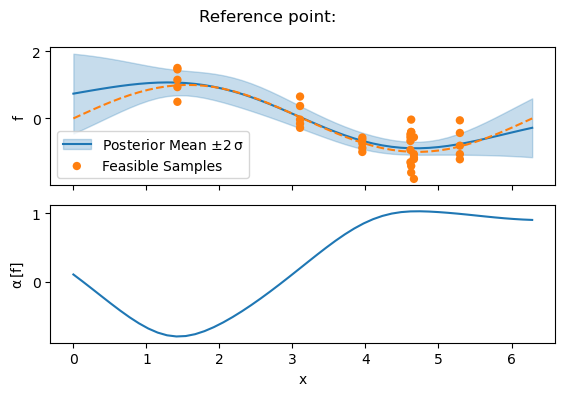

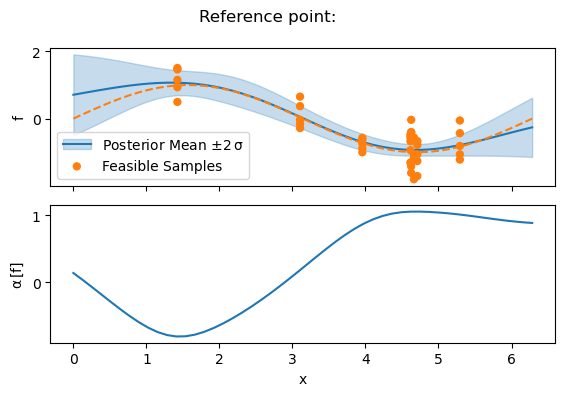

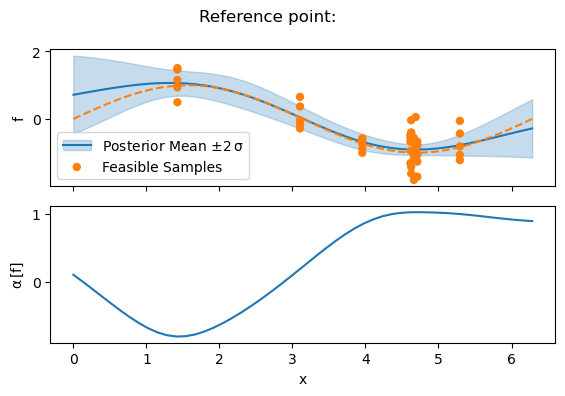

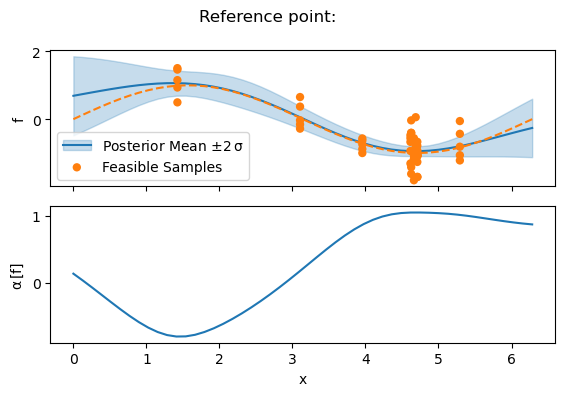

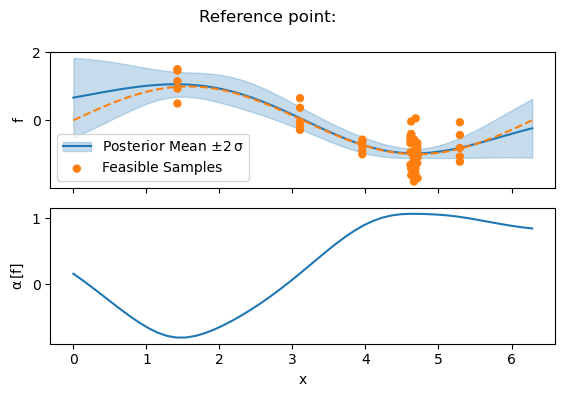

In [11]:
n_steps = 5

# test points for plotting
test_x = torch.linspace(*X.vocs.bounds.flatten(), 50).double()

for i in range(n_steps):
    # get the Gaussian process model from the generator
    model = X.generator.train_model()

    # visualize model
    fig, ax = X.generator.visualize_model(n_grid=len(test_x))

    # plot true function
    true_f = torch.sin(test_x)
    ax[0,0].plot(test_x, true_f, "C1--")

    # do the optimization step
    X.step()



In [13]:
ax[0]

array([<Axes: ylabel='f'>], dtype=object)

In [ ]:
# access the collected data
X.data

## Getting the optimization result
To get the best point (without evaluating it) we ask the generator to
predict the optimum based on the posterior mean.

In [ ]:
X.generator.get_optimum()

## Customizing optimization
Each generator has a set of options that can be modified to effect optimization behavior

In [ ]:
X.generator.dict()